# <p align="center">CNN-CT-BRAIN 🧠</p>

### 1. Empezamos importando librerias y configurando la semilla

In [24]:
import os as os
import numpy as np
import tensorflow as tf
import random

# Si usaramos GPU forma de saber su nombre
print(tf.test.gpu_device_name())
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))
# Declaramos la semilla
seed = 2027

# Semilla aleatoria en NumPy, TensorFlow y Python
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

class_folder_names = os.listdir("archive/files/")
class_folder_names # Clasificacion de los directorios



GPU name:  []


['aneurysm', 'cancer', 'tumor']

Como podemos ver estos son los nombres de los directorios que disponemos

### 2. Empezamos con la parte carga de datos y de preprocesamiento

In [2]:

from tqdm import tqdm
from PIL import Image  # Import Image module from PIL
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np

# Función para cargar y preprocesar imágenes
def load_and_preprocess_images(base_dir):
    image_paths = []
    classes = []

    # Recorrer cada clase en el directorio base
    for cls in os.listdir(base_dir):
        class_path = os.path.join(base_dir, cls)

        # Verificar si es un directorio
        if os.path.isdir(class_path):
            # Recorrer cada archivo en el directorio de la clase
            for file_name in os.listdir(class_path):
                # Filtrar archivos con extensión 'jpg'
                if file_name.split('.')[-1] == 'jpg':
                    image_paths.append(os.path.join(class_path, file_name))
                    classes.append(cls)

    # Codificación de etiquetas
    le = LabelEncoder()
    y = le.fit_transform(classes)
    y = np.array(y)

    inputs = []

    # Cargar imágenes y convertirlas a arrays
    for i in tqdm(image_paths):
        image = load_img(i)
        img_array = img_to_array(image)
        inputs.append(img_array)

    X = np.array(inputs)

    return X, y

# Cargar y preprocesar imágenes
base_dir = "archive/files/"
X, y = load_and_preprocess_images(base_dir)

# Dividir los datos en conjuntos de entrenamiento y prueba
num_classes = len(np.unique(y))
train_test_split(X, y, test_size = 0.2)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

# Convertir etiquetas a su forma one-hot
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Preprocesar los datos (escalarlos entre 0 y 1 y convertir las etiquetas a one-hot encoding)
x_train = X_train.astype('float32') 
x_val = X_val.astype('float32') 
x_test = X_test.astype('float32') 

# Imprimir dimensiones de los conjuntos de entrenamiento y prueba
print(f"Train data shape: {x_train.shape}, y_train shape: {y_train_one_hot.shape}")
print(f"Test data shape: {x_test.shape}, y_test shape: {y_test_one_hot.shape}")

100%|██████████| 259/259 [00:01<00:00, 208.95it/s]


Train data shape: (165, 512, 512, 3), y_train shape: (165, 3)
Test data shape: (52, 512, 512, 3), y_test shape: (52, 3)


Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 0.9082 - accuracy: 0.5539 - val_loss: 0.6045 - val_accuracy: 0.8077
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.5568 - accuracy: 0.7794 - val_loss: 0.4281 - val_accuracy: 0.8269
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5201 - accuracy: 0.7745 - val_loss: 0.3684 - val_accuracy: 0.8269
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.3630 - accuracy: 0.8284 - val_loss: 0.2712 - val_accuracy: 0.9038
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.2678 - accuracy: 0.9118 - val_loss: 0.2106 - val_accuracy: 0.9615
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.2124 - accuracy: 0.9412 - val_loss: 0.1806 - val_accuracy: 0.9231
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.1774 - accuracy: 0.9412 - val_loss: 0.1470 - val_accuracy: 0.9615
Epoch 8/20
7/7 [=======================

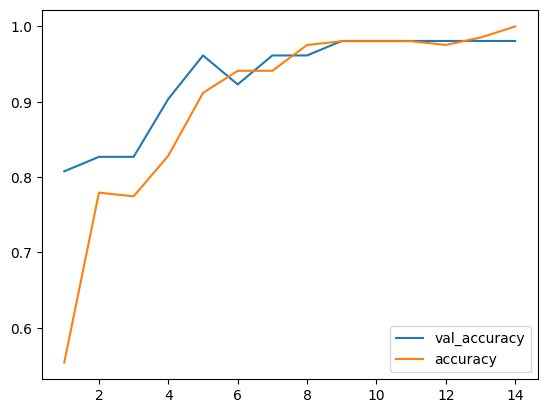

In [25]:
import cv2
import pandas as pd

from tqdm import tqdm
from PIL import Image  # Import Image module from PIL
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
import os as os
import numpy as np
import tensorflow as tf
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('archive/ct_brain.csv',dtype={'type':'category'})

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['type'])
num_classes = len(label_encoder.classes_)

# Loading and preprocessing the image
images = []
for index, row in df.iterrows():
    image = cv2.imread(f'archive/files/{row["jpg"]}')
    image = cv2.resize(image, (224, 224))  # Resize the image if needed
    image = image.astype('float32') / 255.0  # Normalize pixel values
    images.append(image)

# Convert list to numpy array
images = np.array(images)
labels = np.array(labels)
import matplotlib.pyplot 



X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=62)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 20

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs,callbacks=[early_stopping])

train_hist = history.history
epochs = list(range(1, len(train_hist['val_accuracy']) + 1))
plt.plot(epochs,train_hist['val_accuracy'],label="val_accuracy")
plt.plot(epochs,train_hist['accuracy'],label="accuracy")
plt.legend(loc="lower right")


        


In [ ]:
plt.plot(epochs,train_hist['loss'],label="loss")
plt.plot(epochs,train_hist['val_loss'],label="val_loss")
plt.legend(loc="upper right")

Como podemos observar tenemos 52 imágenes de prueba con las mismas dimensiones que las de entrenamiento.

### 3. Seguimos con la parte de visualizaccion de los datos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


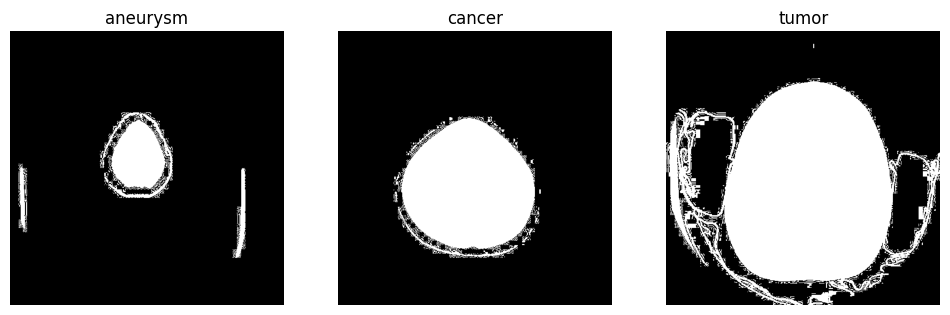

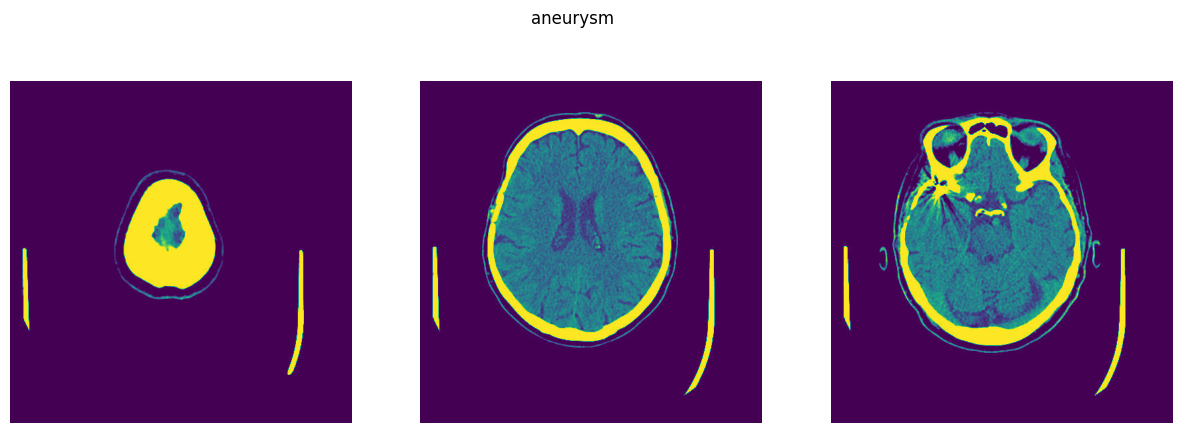

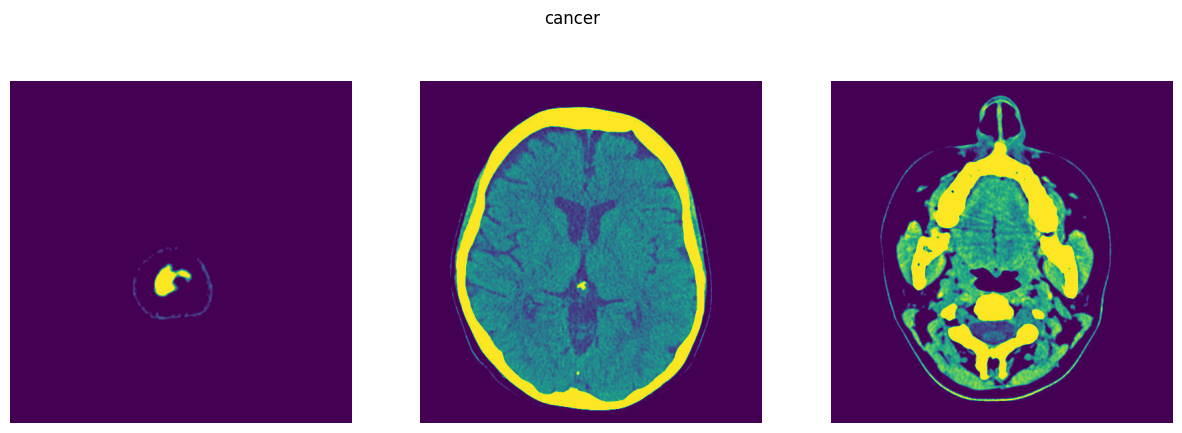

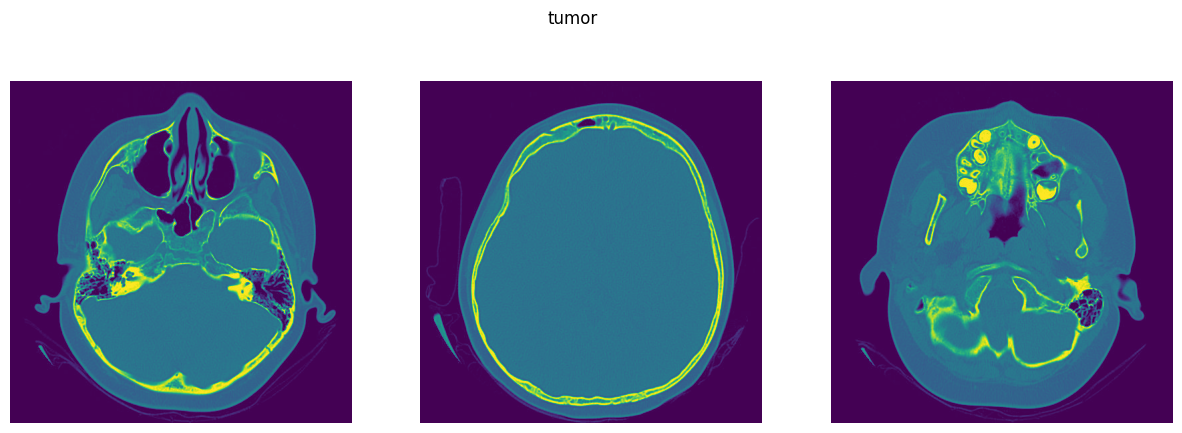

In [3]:
# Visualizacion de los datos
import plotly.express as px
import matplotlib.pyplot as plt
import cv2


unique_classes = np.unique(y_train)
class_indices = {class_id: np.where(y_train == class_id)[0] for class_id in unique_classes}
class_indices


images_count = [len(class_indices[key]) for key in class_indices.keys()]

fig = px.bar(x=class_folder_names, y=images_count, color=class_folder_names)

fig.update_layout(xaxis_title='Disease', yaxis_title='Count', title="Total samples for each class")
fig.update_traces(texttemplate='%{y}', textposition='inside')

fig.show()

plt.figure(figsize=(12, 5))

for i, (class_id, indices) in enumerate(class_indices.items()):
    random_index = np.random.choice(indices)
    random_image = X_train[random_index] 

    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(random_image)
    plt.title(class_folder_names[class_id])
    plt.axis('off')

plt.show()

# Define the base directory
base_dir = "archive/files/"

# Get the class folder names
class_folder_names = os.listdir(base_dir)

# Define the number of images to display for each class
images_to_display = 3

# Loop through each class
for class_id, cls in enumerate(class_folder_names):
    class_path = os.path.join(base_dir, cls)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Get a list of image files
        image_files = [file for file in os.listdir(class_path) if file.endswith('.jpg')]

        # Randomly select 'images_to_display' number of images
        selected_images = np.random.choice(image_files, images_to_display, replace=False)

        # Display the selected images for this class
        plt.figure(figsize=(15, 5))
        plt.suptitle(cls)

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = img / 255.0  # Normalize to the range [0, 1]

            plt.subplot(1, images_to_display, i + 1)
            plt.imshow(img)  # Use gray colormap
            plt.axis('off')

        plt.show()



Hemos utilizado la libreria plotly para representar la cantidad de muestras de aneurisma, cancer y tumor en formato grafico de barras. Luego vemos unas muestras de las distintas imagenes.

Adicionalmente usamos libreria cv2 para ver las imagenes del cerebro en formato escaner.

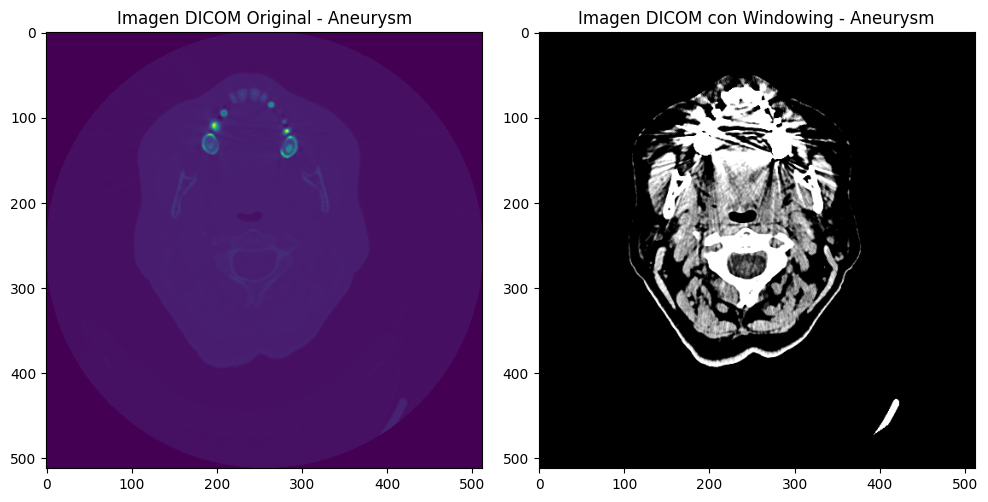

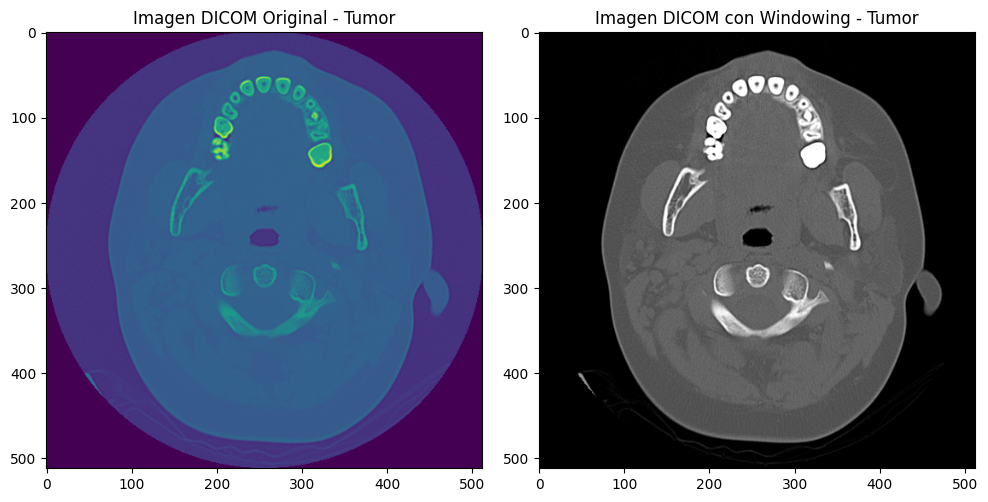

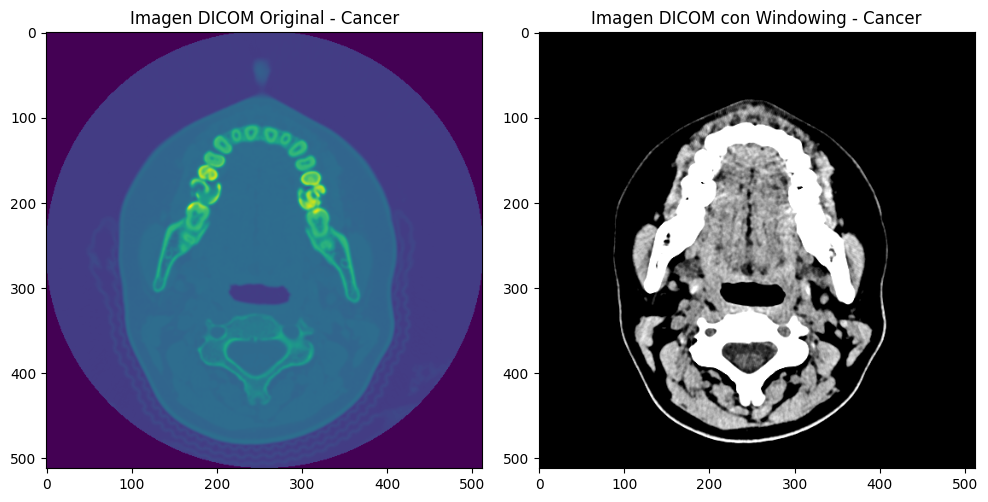

In [23]:
import matplotlib.pyplot as plt
import pydicom as dicom
import os

def load_and_display_images(disease_folder, title):
    # Obtener la lista de archivos en el directorio de la enfermedad
    files = os.listdir(disease_folder)
    
    # Filtrar archivos para obtener imágenes DICOM
    dcm_files = [file for file in files if file.lower().endswith(".dcm")]

    # Cargar la primera imagen jpg
    dcm_path = os.path.join(disease_folder, dcm_files[0])
    dcm_dataset = dicom.dcmread(dcm_path)

    # Obtener la imagen y aplicar windowing
    dcm_image = dcm_dataset.pixel_array
    window_center = dcm_dataset.WindowCenter if hasattr(dcm_dataset, 'WindowCenter') else dcm_image.mean()
    window_width = dcm_dataset.WindowWidth if hasattr(dcm_dataset, 'WindowWidth') else dcm_image.max() - dcm_image.min()
    img_min = window_center - window_width / 2
    img_max = window_center + window_width / 2
    dcm_image = np.clip(dcm_image, img_min, img_max)

    # Crear subgráficos
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Mostrar la imagen original en el primer subgráfico
    axs[0].imshow(dcm_dataset.pixel_array)
    axs[0].set_title(f'Imagen DICOM Original - {title}')

    # Mostrar la imagen con windowing en el segundo subgráfico
    axs[1].imshow(dcm_image, cmap='gray')
    axs[1].set_title(f'Imagen DICOM con Windowing - {title}')

    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

# Directorios para cada enfermedad
aneurysm_folder = "archive/files/aneurysm"
tumor_folder = "archive/files/tumor"
cancer_folder = "archive/files/cancer"

# Visualizar imágenes para cada enfermedad
load_and_display_images(aneurysm_folder, "Aneurysm")
load_and_display_images(tumor_folder, "Tumor")
load_and_display_images(cancer_folder, "Cancer")

Se ha utilizado la ibreria pydicom que se utuliza para visualizar imágenes de cerebro en formato DICOM.

El "windowing", es una técnica utilizada para ajustar la apariencia visual de las imágenes radiológicas.

Permite resaltar o mejorar la visibilidad de ciertas estructuras anatómicas o patológicas al ajustar la presentación de niveles de gris en la imagen.

### 4. Creamos el modelo de entrenamiento <span style="color:red">Falta modificar</span>


Found 259 files belonging to 3 classes.


Original Images:


Augmented Images:
Normalized Images:


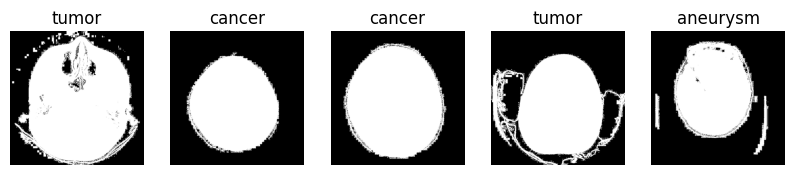

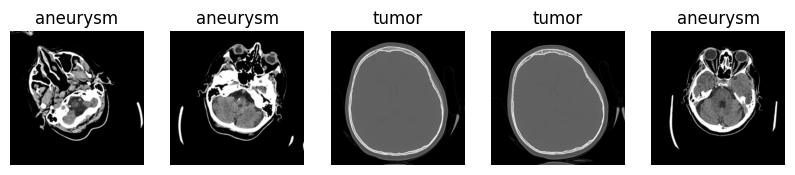

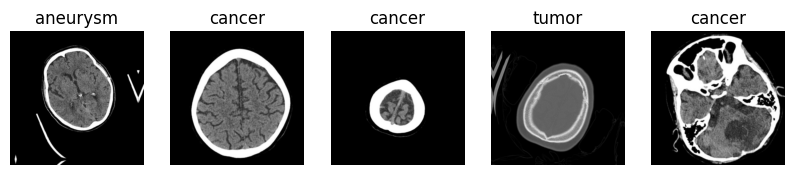

In [24]:
#####################
# CREACION DEL MODELO
#####################

# Constantes
IMAGE_SIZE = 516
BATCH_SIZE = 32

# Cargamos un batch del dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/files",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Obtenemos los nombres de las clases
class_names = dataset.class_names

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

# Aplicamos el data augmentation rescalando la imagen
augmented_dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
augmented_dataset = augmented_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Normalizmaos las imagenes y realizmaos el reescalado
normalized_dataset = augmented_dataset.map(lambda x, y: (x, y))
normalized_dataset = normalized_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Funcion para mostrar las imagenes del dataset
def show_images(dataset, num_batches=1, num_images=5):
    plt.figure(figsize=(10 * num_batches, 10 * num_images))
    for batch_num, (images, labels) in enumerate(dataset.take(num_batches)):
        for i in range(num_images):
            ax = plt.subplot(num_batches, num_images, batch_num * num_images + i + 1)
            plt.imshow(images[i].numpy().astype("float32"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Mostramos las imagenes original
print("Original Images:")
show_images(dataset)

# Mostrar las imagenes aumentadas
print("Augmented Images:")
show_images(augmented_dataset)

# Mostrar las imagenes normalizadas
print("Normalized Images:")
show_images(normalized_dataset)

plt.show()

Se utiliza prefetch para mejorar el rendimiento del conjunto de datos, permitiendo que las imágenes se carguen en paralelo mientras se entrena el modelo.

In [27]:
# Copia las clases obtenidas del conjunto de datos
class_names = class_names

def split_train_test_val(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=False):
    # Obtén el tamaño total del conjunto de datos
    ds_size = len(ds)

    # Calcula el tamaño de los conjuntos de entrenamiento, prueba y validación
    train_size = round(train_split * ds_size)
    test_size = round(test_split * ds_size)
    val_size = round(val_split * ds_size)

    # Si se solicita, baraja el conjunto de datos
    if shuffle:
        ds = ds.shuffle()

    # Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(train_size).take(test_size)
    val_ds = ds.skip(train_size).skip(test_size)

    return train_ds, test_ds, val_ds

# Llama a la función para obtener los conjuntos de entrenamiento, prueba y validación
train_ds, test_ds, val_ds = split_train_test_val(ds=dataset)


In [32]:
tarin_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
class_names = dataset.class_names




image_preprocessing = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, interpolation='bilinear', crop_to_aspect_ratio=False),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),  # Adjust the rotation magnitude
])

BATCH = 64
CHANNELS = 3

input_size = (BATCH,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = tf.keras.models.Sequential([
    image_preprocessing,
    tf.keras.layers.Conv2D(32,(8,8),activation='relu',input_shape=input_size),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names),activation='softmax')
])

model.build(input_shape=input_size)

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (64, 516, 516, 3)         0         
                                                                 
 conv2d_44 (Conv2D)          (64, 509, 509, 32)        6176      
                                                                 
 max_pooling2d_40 (MaxPooli  (64, 254, 254, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (64, 251, 251, 64)        32832     
                                                                 
 dropout_13 (Dropout)        (64, 251, 251, 64)        0         
                                                                 
 conv2d_46 (Conv2D)          (64, 249, 249, 64)        36928     
                                                     

<span style="color:red">Dentro del apartado del entrenamiento de modelo falta entrenarlo, y modificar para plantear cualquier tipo de modelo (el que mejor se ajuste o mostrar varios, etc.)</span>


### 5. Metrica <span style="color:red"> PENDIENTE</span>


In [ ]:
# Mostrar las graficas y matriz de confusion
import matplotlib.pyplot as plt
from early_stopping import EarlyStopping
import os
from keras.callbacks import EarlyStopping

# Entrenar el modelo
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,  # Adjust this value
    decay_steps=1000,
    decay_rate=0.9
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4, restore_best_weights=True)
EPOCHS=12
history = model.fit(train_ds,epochs=EPOCHS,validation_data=val_ds,callbacks=[es],verbose=1)






### 6. Probando el modelo <span style="color:red"> PENDIENTE</span>

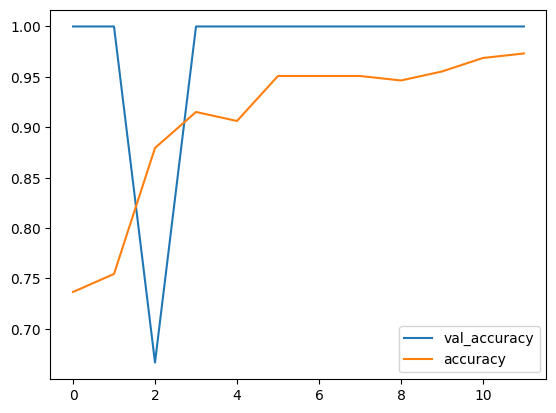

In [17]:
train_hist = history.history
epochs = list(range(EPOCHS))
plt.plot(epochs,train_hist['val_accuracy'],label="val_accuracy")
plt.plot(epochs,train_hist['accuracy'],label="accuracy")
plt.legend(loc="lower right")

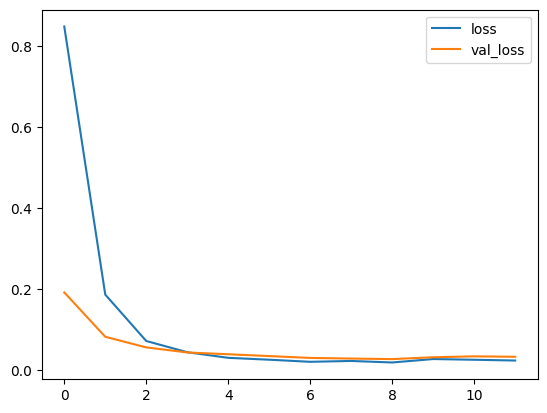

In [64]:
plt.plot(epochs,train_hist['loss'],label="loss")
plt.plot(epochs,train_hist['val_loss'],label="val_loss")
plt.legend(loc="upper right")

In [11]:
score = model.evaluate(test_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.6272 - accuracy: 0.6562


In [ ]:

for img, label in test_ds.take(1):
    # Calcula las predicciones del modelo para todo el lote
    predictions = model.predict(img)

# Ahora, 'predictions' contiene las predicciones del modelo para el lote
# Puedes usar estas predicciones según tus necesidades
print(predictions)

1/1 [==============================] - 1s 793ms/step


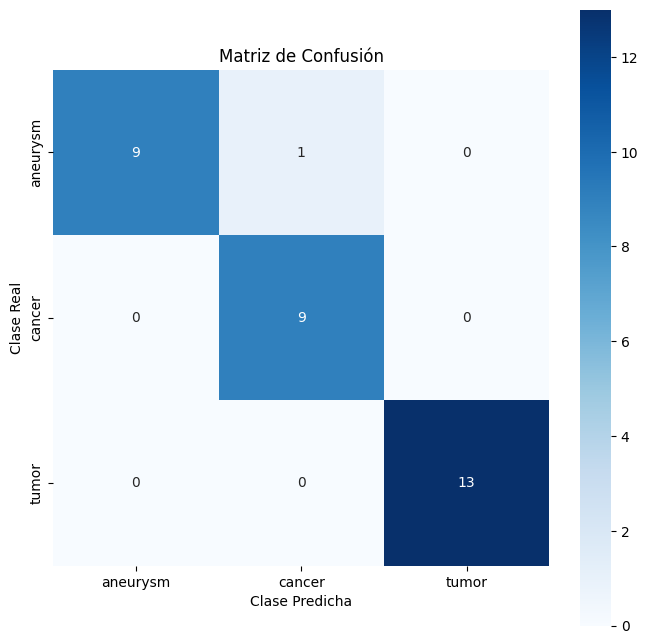

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Obtén las etiquetas reales del conjunto de prueba
true_labels = np.concatenate([label.numpy() for _, label in test_ds])

# Calcula las predicciones del modelo para todo el conjunto de prueba
all_predictions = model.predict(test_ds)

# Obtén las clases únicas en tus etiquetas reales y predichas
classes = np.unique(true_labels)

# Obtén las clases predichas (índice de la clase con probabilidad más alta)
predicted_labels = np.argmax(all_predictions, axis=1)

classname = ['aneurysm', 'cancer', 'tumor']
# Crea la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=classes)

# Visualiza la matriz de confusión con seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=classname, yticklabels=classname)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()
        

### 7. Guardamos el modelo generado

In [ ]:
model.save("model_cnn_ct_brain.keras")




100%|██████████| 259/259 [00:00<00:00, 261.54it/s]


Train data shape: (165, 512, 512, 3), y_train shape: (165, 3)
Test data shape: (52, 512, 512, 3), y_test shape: (52, 3)
Epoch 1/20
7/7 [==============================] - 65s 9s/step - loss: 2.3745 - accuracy: 0.3480 - val_loss: 1.0674 - val_accuracy: 0.3462
Epoch 2/20
7/7 [==============================] - 50s 7s/step - loss: 1.0534 - accuracy: 0.3578 - val_loss: 0.9837 - val_accuracy: 0.3462
Epoch 3/20
7/7 [==============================] - 51s 7s/step - loss: 0.9778 - accuracy: 0.4020 - val_loss: 0.8139 - val_accuracy: 0.7692
Epoch 4/20
7/7 [==============================] - 51s 7s/step - loss: 0.8429 - accuracy: 0.6373 - val_loss: 0.7689 - val_accuracy: 0.6538
Epoch 5/20
7/7 [==============================] - 52s 7s/step - loss: 0.7527 - accuracy: 0.6765 - val_loss: 0.4830 - val_accuracy: 0.9423
Epoch 6/20
7/7 [==============================] - 50s 7s/step - loss: 0.6513 - accuracy: 0.7500 - val_loss: 0.9129 - val_accuracy: 0.6154
Epoch 7/20
7/7 [==============================] - 47

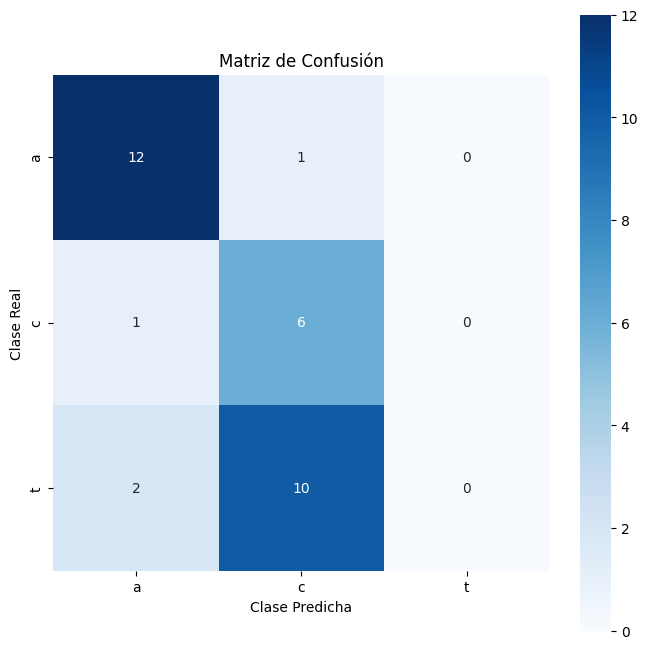

In [9]:
import os as os
import numpy as np
import tensorflow as tf
import random
import cv2
import pandas as pd
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Declaramos semilla
seed = 2027

#Semilla aleatoria en Numpy,Tensorflow y Python
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
class_folder_names = os.listdir("archive/files/")
class_folder_names # Clasificacion de los directorios

# Función para cargar y preprocesar imágenes
def load_and_preprocess_images(base_dir):
    image_paths = []
    classes = []

    # Recorrer cada clase en el directorio base
    for cls in os.listdir(base_dir):
        class_path = os.path.join(base_dir, cls)

        # Verificar si es un directorio
        if os.path.isdir(class_path):
            # Recorrer cada archivo en el directorio de la clase
            for file_name in os.listdir(class_path):
                # Filtrar archivos con extensión 'jpg'
                if file_name.split('.')[-1] == 'jpg':
                    image_paths.append(os.path.join(class_path, file_name))
                    classes.append(cls)

    # Codificación de etiquetas
    le = LabelEncoder()
    y = le.fit_transform(classes)
    y = np.array(y)

    inputs = []

    # Cargar imágenes y convertirlas a arrays
    for i in tqdm(image_paths):
        image = load_img(i)
        img_array = img_to_array(image)
        inputs.append(img_array)

    X = np.array(inputs)

    return X, y

# Cargar y preprocesar imágenes
base_dir = "archive/files/"
X, y = load_and_preprocess_images(base_dir)
num_classes = len(np.unique(y))
train_test_split(X, y, test_size = 0.2)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

# Convertir etiquetas a su forma one-hot
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Preprocesar los datos (escalarlos entre 0 y 1 y convertir las etiquetas a one-hot encoding)
x_train = X_train.astype('float32') 
x_val = X_val.astype('float32') 
x_test = X_test.astype('float32') 

# Imprimir dimensiones de los conjuntos de entrenamiento y prueba
print(f"Train data shape: {x_train.shape}, y_train shape: {y_train_one_hot.shape}")
print(f"Test data shape: {x_test.shape}, y_test shape: {y_test_one_hot.shape}")

df = pd.read_csv('archive/ct_brain.csv',dtype={'type':'category'})
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['type'])
num_classes = len(label_encoder.classes_)

# Loading and preprocessing the image
images = []
for index, row in df.iterrows():
    image = cv2.imread(f'archive/files/{row["jpg"]}')
    image = image.astype('float32') / 255.0  # Normalize pixel values
    images.append(image)

# Convert list to numpy array
images = np.array(images)
labels = np.array(labels)

#Division de datos
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=62)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
num_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

#modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 3), groups=1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


#compila
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Entrenamiento

num_epochs = 20
batch_size = 32
rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range=rango_rotacion,
    width_shift_range=mov_ancho,
    height_shift_range=mov_alto,
    zoom_range=rango_acercamiento,
)

datagen=datagen.flow(X_train,y_train,batch_size=batch_size,shuffle=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(datagen, validation_data=(X_test, y_test), epochs=num_epochs,callbacks=[early_stopping],steps_per_epoch=int(np.ceil(200 / float(batch_size))),
    validation_steps=int(np.ceil(100 / float(batch_size))))
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/files",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
ds_size = len(ds)
train_size = round(0.8 * ds_size)
test_size = round(0.1 * ds_size)
test_ds = ds.skip(train_size).take(test_size)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Obtén las etiquetas reales
true_labels = np.concatenate([label.numpy() for _, label in test_ds])

# Obtén las predicciones
all_predictions = model.predict(test_ds)

# Convierte las predicciones a índices de clases
predicted_labels = np.argmax(all_predictions, axis=1)

# Obtén las clases únicas
classes = np.unique(true_labels)

# Construye la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=classes)
classname = ['a','c','t']

# Visualiza la matriz de confusión con seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=classname, yticklabels=classname)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()




In [ ]:

#Grafica val accuracy y accuracy
train_hist = history.history
epochs = list(range(1, len(train_hist['val_accuracy']) + 1))
plt.plot(epochs,train_hist['val_accuracy'],label="val_accuracy")
plt.plot(epochs,train_hist['accuracy'],label="accuracy")
plt.legend(loc="lower right")



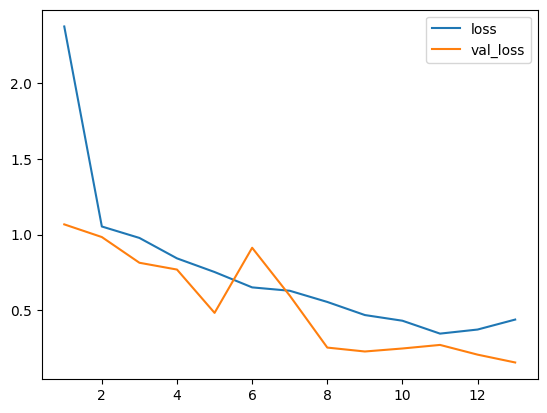

In [61]:
#Grafica val lost y lost
plt.plot(epochs,train_hist['loss'],label="loss")
plt.plot(epochs,train_hist['val_loss'],label="val_loss")
plt.legend(loc="upper right")



In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

IMAGE_SIZE = 512
BATCH_SIZE = 32
num_epochs = 20
batch_size = 32
rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range=rango_rotacion,
    width_shift_range=mov_ancho,
    height_shift_range=mov_alto,
    zoom_range=rango_acercamiento,
)

datagen=datagen.flow(X_train,y_train,batch_size=batch_size,shuffle=True)
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/files",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
ds_size = len(ds)
train_size = round(0.8 * ds_size)
test_size = round(0.1 * ds_size)
test_ds = ds.skip(train_size).take(test_size)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Obtén las etiquetas reales
true_labels = np.concatenate([label.numpy() for _, label in test_ds])

# Obtén las predicciones
all_predictions = model.predict(test_ds)

# Convierte las predicciones a índices de clases
predicted_labels = np.argmax(all_predictions, axis=1)

# Obtén las clases únicas
classes = np.unique(true_labels)

# Construye la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=classes)

# Visualiza la matriz de confusión con seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=classname, yticklabels=classname)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()




NameError: name 'ImageDataGenerator' is not defined